<a href="https://colab.research.google.com/github/DhruboDevPramanik/Deep-Learning/blob/main/1_batch%2Cstochastic%2Ccallback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data


In [ ]:
import pandas as pd

# Sample data from the image
data = {
    'ID': [1, 2, 3, 4, 5,6,7,8,9,10],

    'Age': [25, 30, 28, 35, 22,32,22,21,34,45],

    'Salary': [50000, 60000, 55000, 58000, 62000,62000,45000,40000,70000,80000],

    'Perched': [1, 0, 1,0,1,0,1,1,0,0]
}

df = pd.DataFrame(data)



In [ ]:
import pandas as pd
import random

# Generate 100 entries
data = {
    'ID': list(range(1, 101)),
    'Age': [random.randint(20, 60) for _ in range(100)],
    'Salary': [random.randint(40000, 90000) for _ in range(100)],
    'Perched': [random.randint(0, 1) for _ in range(100)]
}

df = pd.DataFrame(data)


In [ ]:
X=df.drop(['Perched','ID'],axis=1)
y=df['Perched']

In [ ]:
X

,Age,Salary
0,58,82574
1,52,65724
2,53,76876
3,27,81841
4,58,43748
...,...,...
95,22,51011
96,59,73613
97,36,83283
98,24,71187


In [ ]:
df.shape


(100, 4)

# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)


In [ ]:
X

array([[ 1.57534909,  1.11302092],
       [ 1.06799028, -0.07754506],
       [ 1.15255009,  0.71041885],
       [-1.04600474,  1.06122954],
       [ 1.57534909, -1.63029747],
       [-0.36952633, -0.687454  ],
       [-1.21512434,  0.65368149],
       [ 1.32166969,  1.15237673],
       [ 0.56063148, -1.26542609],
       [ 0.39151188,  1.28139592],
       [-0.28496653, -0.74475661],
       [-0.70776553,  0.17512342],
       [ 0.22239228,  1.31382736],
       [ 1.49078929, -0.61474822],
       [ 0.22239228,  0.34540616],
       [ 0.56063148, -1.84184373],
       [-1.46880374,  1.47775099],
       [-0.53864593,  0.32138287],
       [-0.20040673, -0.66237086],
       [ 1.23710989, -0.75740416],
       [-1.63792334,  1.58521988],
       [ 1.65990889,  0.64838223],
       [-0.36952633, -1.35021417],
       [-0.87688513, -1.27107863],
       [-0.70776553, -0.32159342],
       [-1.63792334,  0.15957894],
       [-0.53864593, -1.40469051],
       [-0.62320573, -0.54508068],
       [ 0.64519128,

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(80, 2)

# Model Selection

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model =Sequential()
model.add(Dense(80,activation='sigmoid',input_dim=2))
model.add(Dense(40,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 80)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,485 (60.49 KB)

 Trainable params: 5,161 (20.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,324 (40.33 KB)

normal mini batch gradient

# normal mini batch gradient

In [ ]:
import time
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
start=time.time()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=20,epochs=100,verbose=1)
end=time.time()
print(end-start)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6283 - loss: 0.6682 - val_accuracy: 0.6500 - val_loss: 0.6706
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5767 - loss: 0.6817 - val_accuracy: 0.6500 - val_loss: 0.6837
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5567 - loss: 0.6875 - val_accuracy: 0.5500 - val_loss: 0.6994
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6033 - loss: 0.6738 - val_accuracy: 0.6000 - val_loss: 0.6921
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5600 - loss: 0.6779 - val_accuracy: 0.5500 - val_loss: 0.6911
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5817 - loss: 0.6682 - val_accuracy: 0.6500 - val_loss: 0.6869
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5433 - loss: 0.6824 - val_accuracy: 0.6500 - val_loss: 0.6825
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5583 - loss: 0.6878 - val_accuracy: 0.6500 - val_loss:

# stochastic gradient

stochastic gradient

In [ ]:
import time
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start=time.time()
history=model.fit(X_train,y_train,verbose=0, batch_size=1,epochs=10)
print(time.time()-start)

3.1704154014587402


callback

# CallBack

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

# Mini batch with callback

In [ ]:
import time
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
start=time.time()
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=10,epochs=40,verbose=0,callbacks=callback)
end=time.time()
print(end-start)

Epoch 21: early stopping
5.167392730712891


# Plotting the loss and val_loss

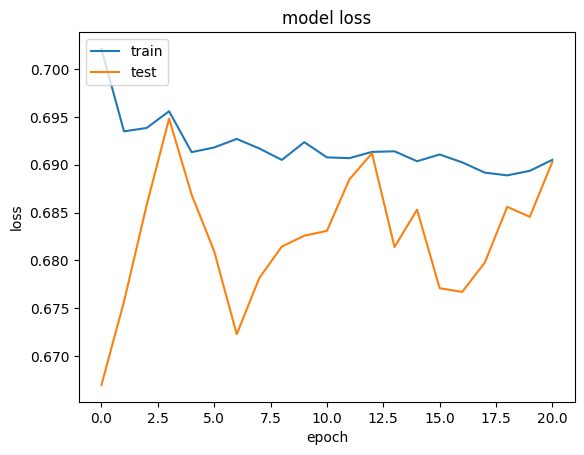

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()